In [1]:
library("igraph")


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
network <- read.graph("facebook_combined.txt/facebook_combined.txt", format="edgelist", directed=FALSE)

In [3]:
personalized_network <- function(core_node) {
    print("entered")
    subgraph_nodes <- c(core_node, neighbors(network, core_node))
    personal_network <- induced_subgraph(network, c(core_node, neighbors(network, core_node)))
    V(personal_network)$label = sort(subgraph_nodes)
    return(personal_network)
}

In [4]:
core_nodes = c(1, 108, 349, 484, 1087)

In [5]:
mutual_friends <- function(graph, node1, node2) {
    return(intersection(neighbors(graph, node1), neighbors(graph, node2)))
}

embeddedness <- function(graph, node1, node2) {
    return(length(mutual_friends(graph, node1, node2)))
}

dispersion <- function(graph, node1, node2) {  
    g_labels <- V(graph)$label
    node1_label <- V(graph)[node1]$label
    node2_label <- V(graph)[node2]$label

    labels <- c()
    for (label in g_labels) {
        if (label != node1_label & label != node2_label) {
            labels <- c(labels, label)
        }
    }
    
    delete_graph <- delete_vertices(graph, c(node2, node1))
    V(delete_graph)$label <- sort(labels)
    
    mutual_friend <- mutual_friends(graph, node1, node2) 
    mutual_labels <- V(graph)[mutual_friend]$label
    
    vertices <- c()
    for(x in 1:length(mutual_labels)){
            vertices = c(vertices, which(V(delete_graph)$label == mutual_labels[x]))
        }
    
    dist <- distances(delete_graph, v=vertices, to=vertices)
    dist[is.infinite(dist)] <- NA
    return(sum(dist, na.rm = TRUE)/2)
}

personalized_network <- function(core_node) {
    subgraph_nodes <- c(core_node, neighbors(network, core_node))
    personal_network <- induced_subgraph(network, c(core_node, neighbors(network, core_node)))
    V(personal_network)$label = sort(subgraph_nodes)
    return(personal_network)
}

[1] 1
[1] "done finding PN"
[1] "done finding neighbours"
[1] "done finding neighbour"


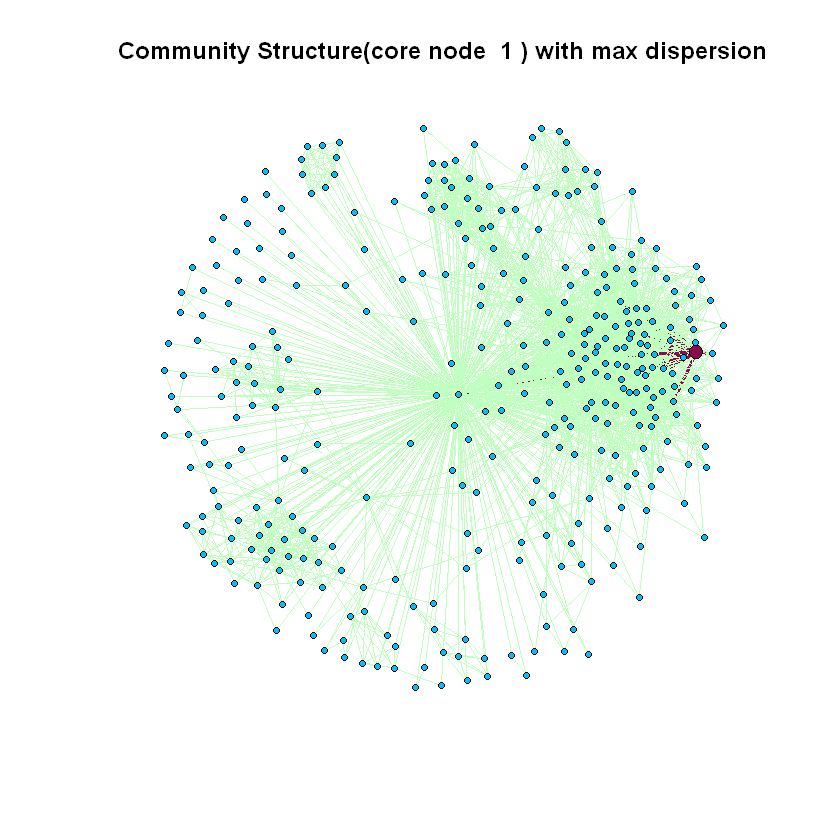

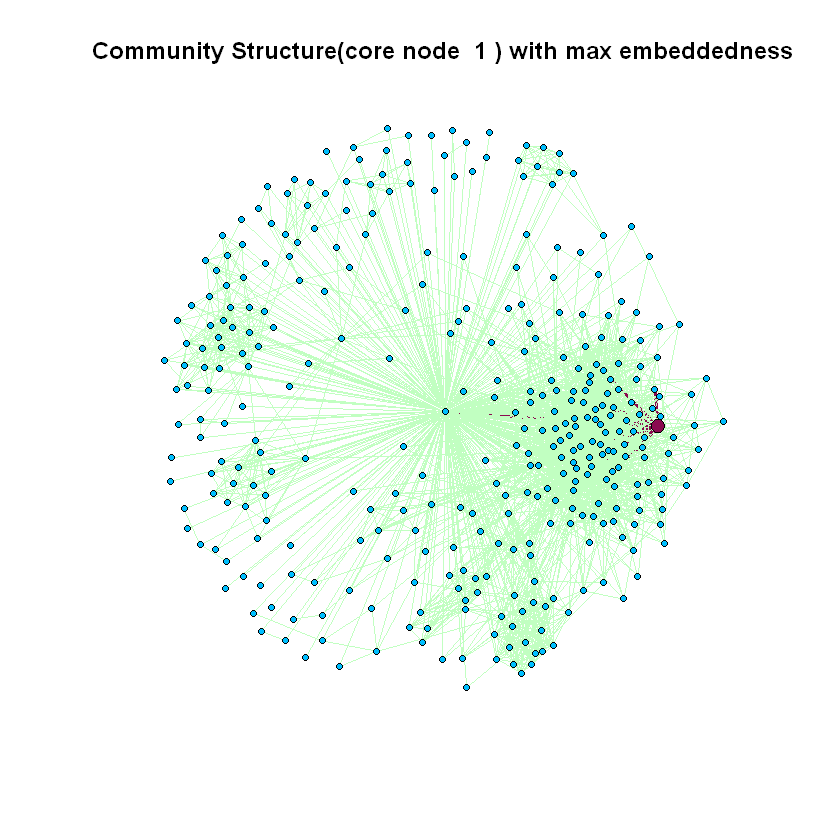

[1] 108
[1] "done finding PN"
[1] "done finding neighbours"
[1] "done finding neighbour"


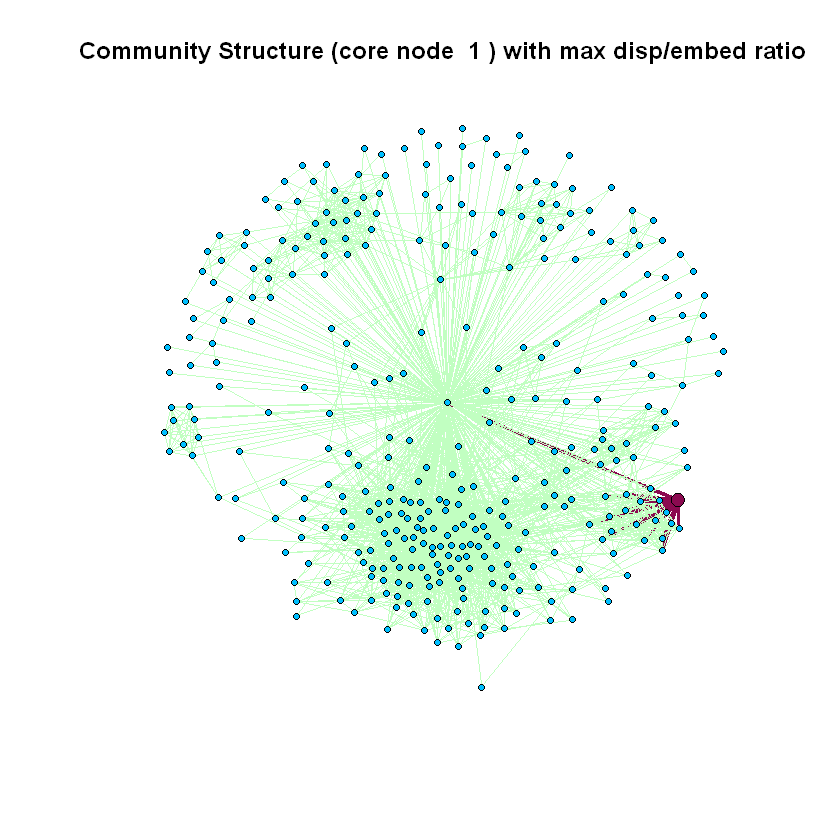

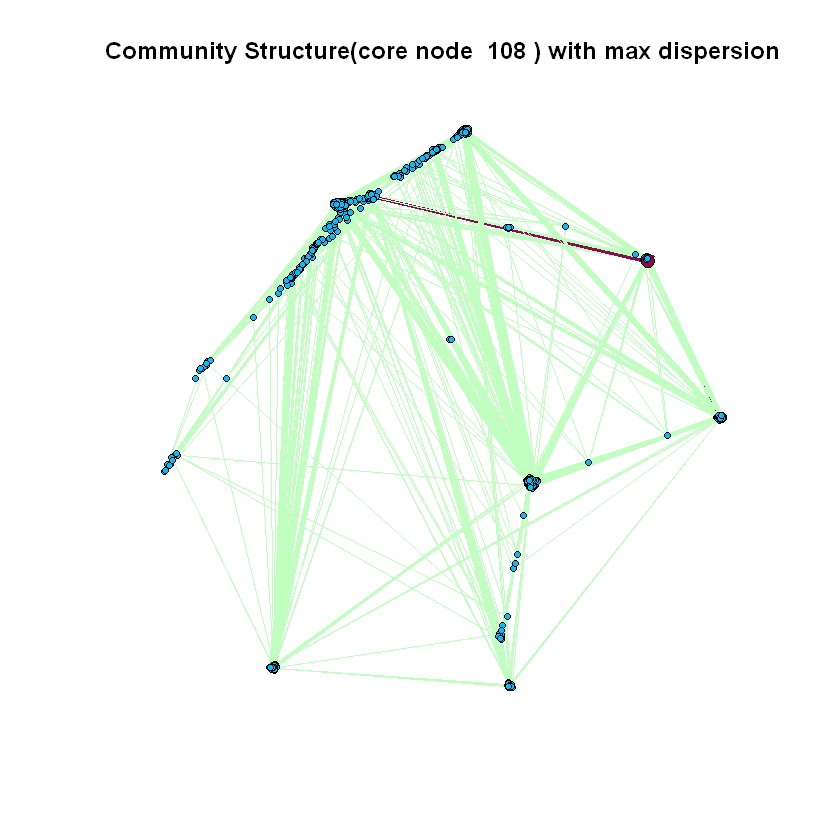

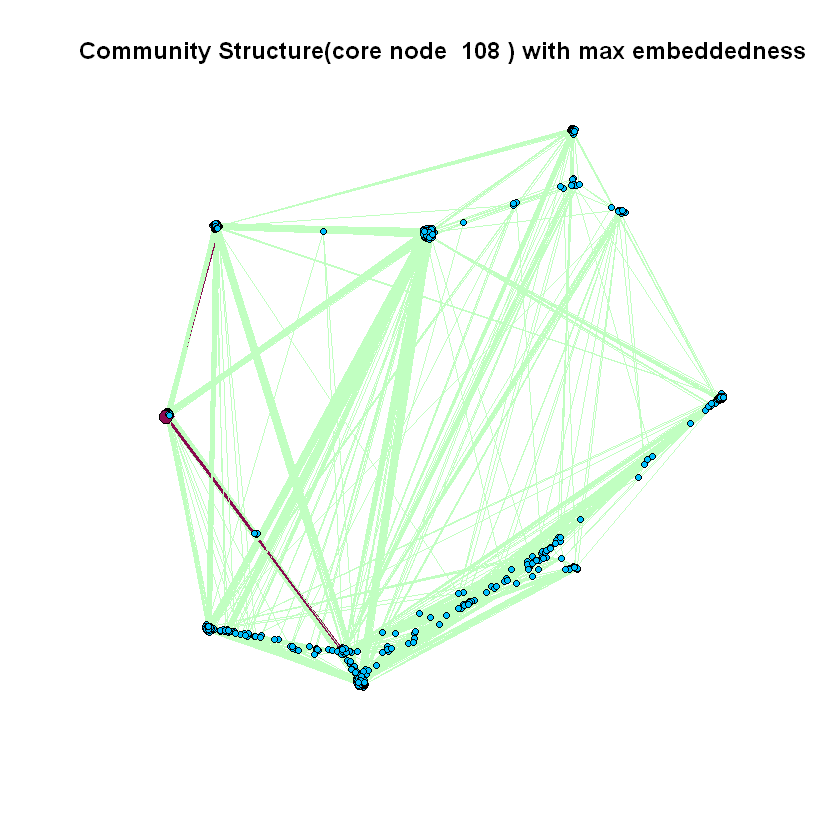

[1] 349
[1] "done finding PN"
[1] "done finding neighbours"
[1] "done finding neighbour"


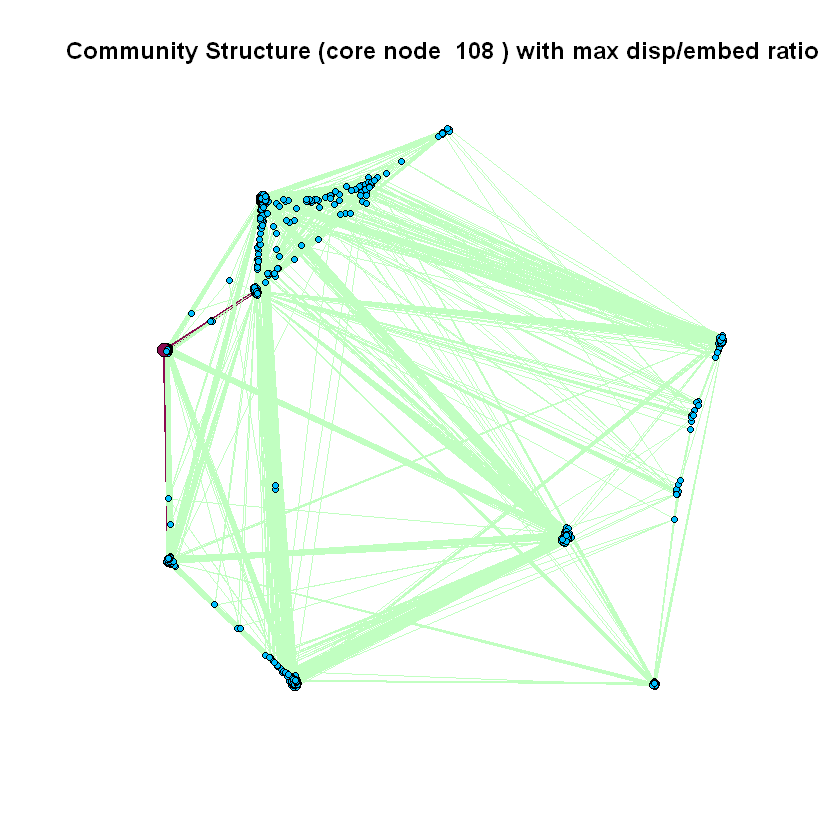

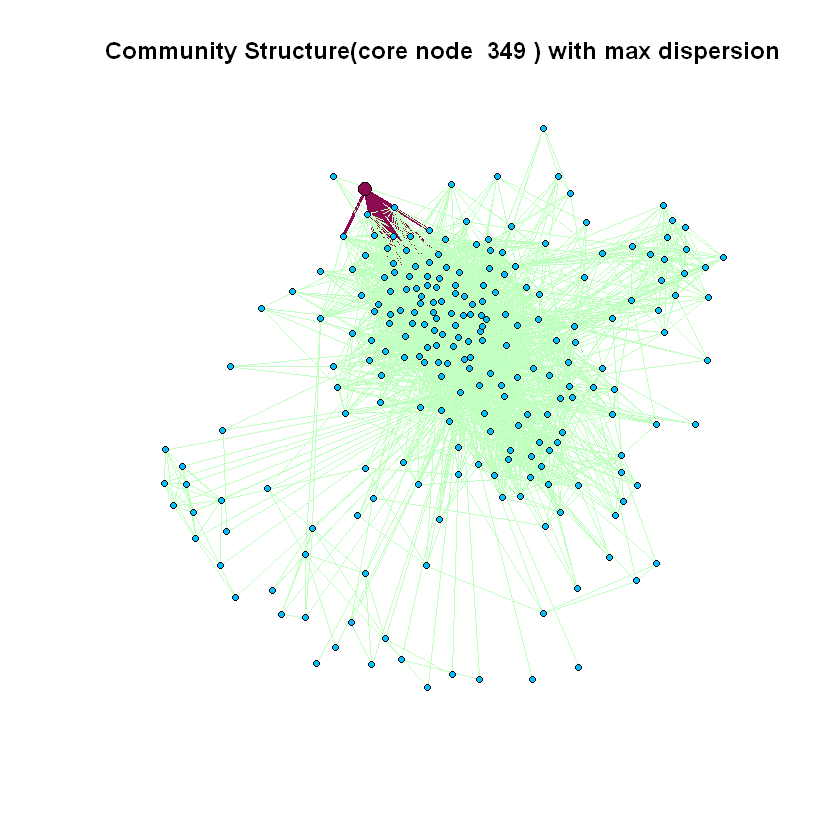

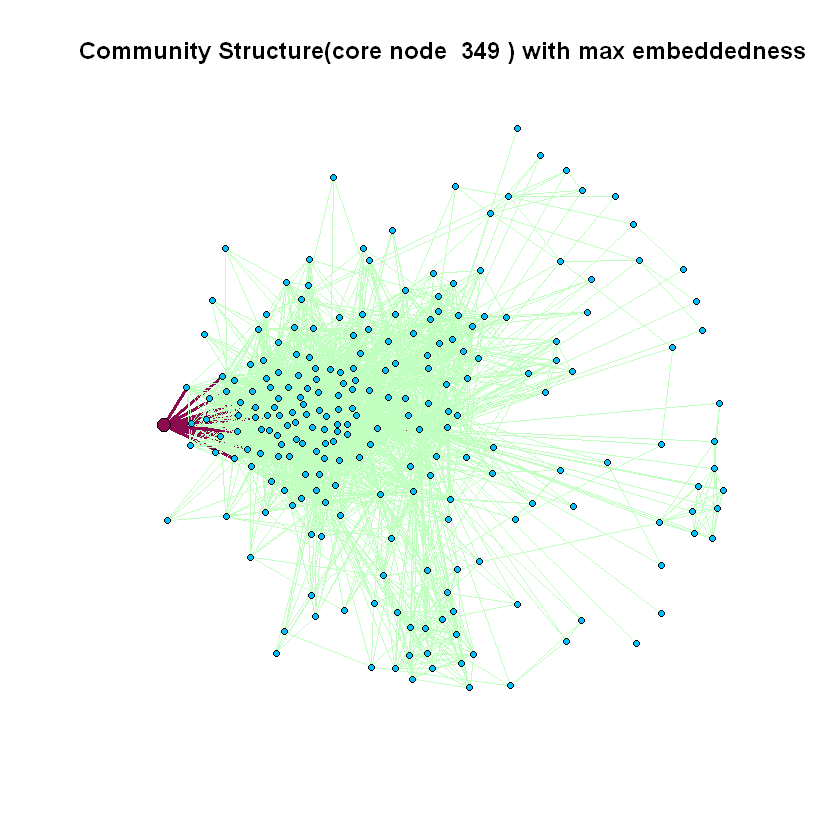

[1] 484
[1] "done finding PN"
[1] "done finding neighbours"
[1] "done finding neighbour"


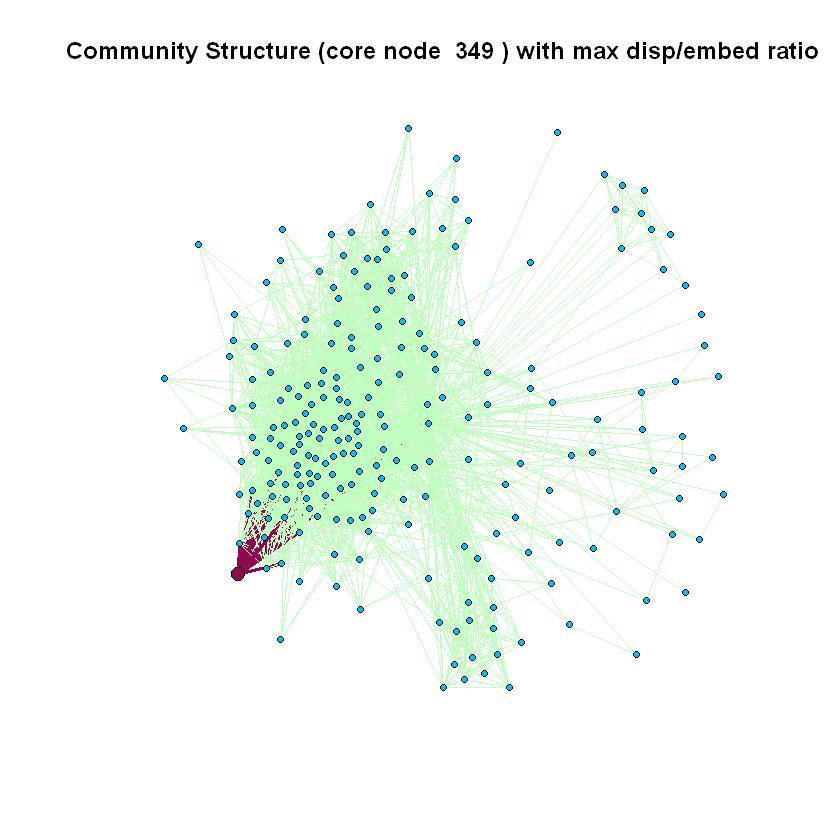

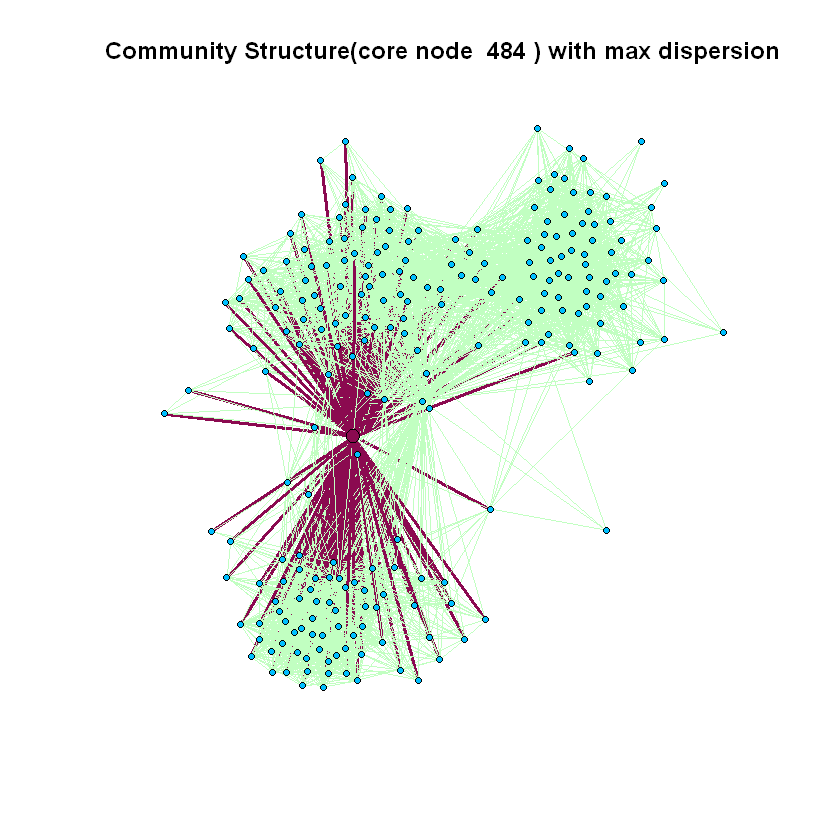

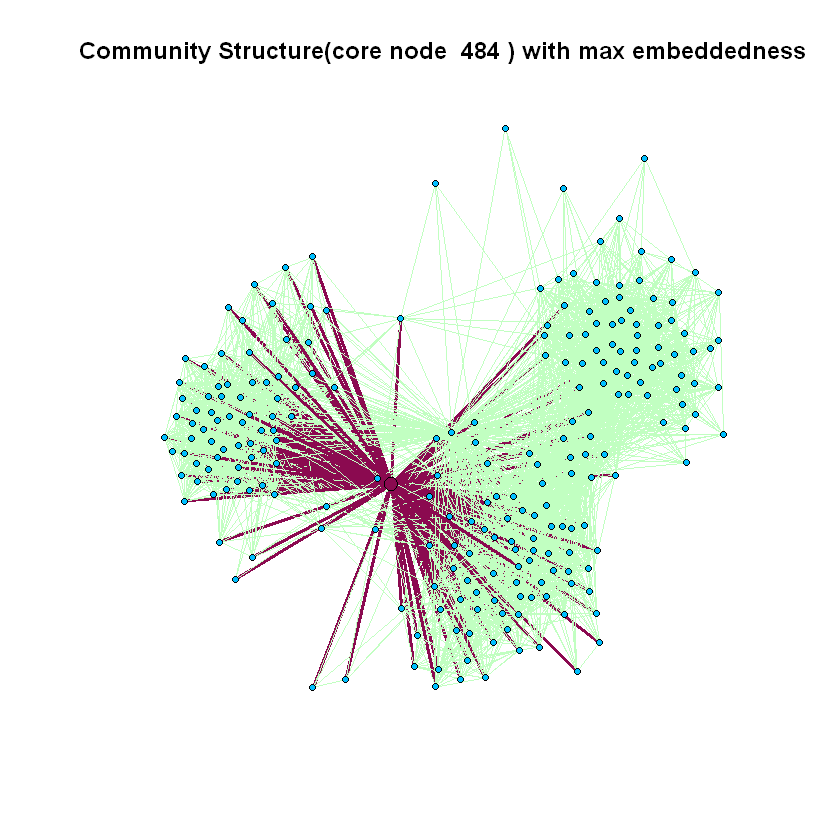

[1] 1087
[1] "done finding PN"
[1] "done finding neighbours"
[1] "done finding neighbour"


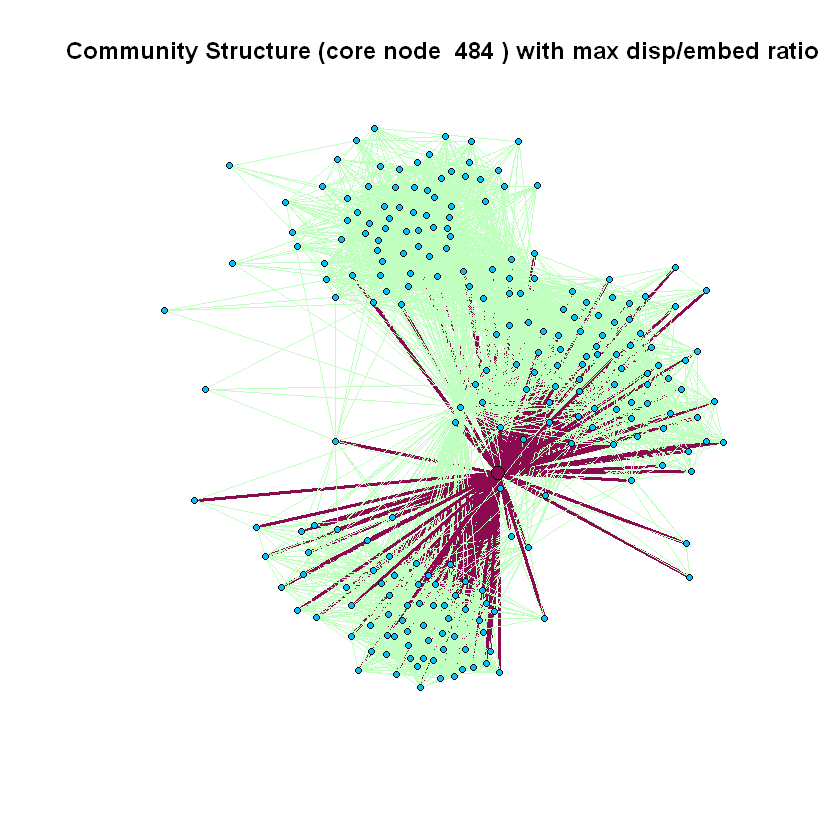

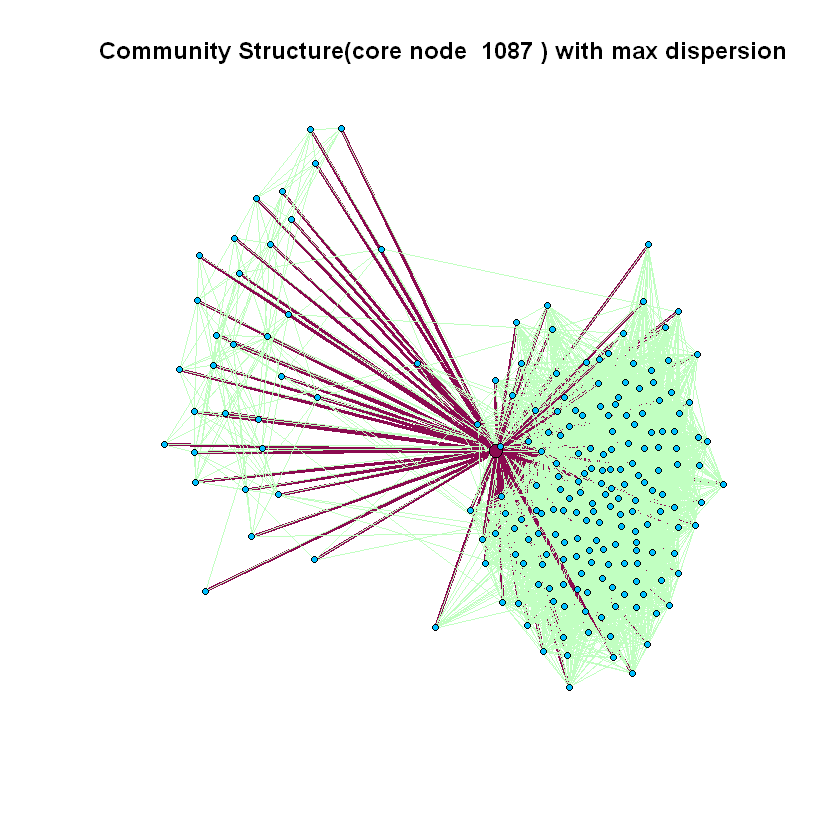

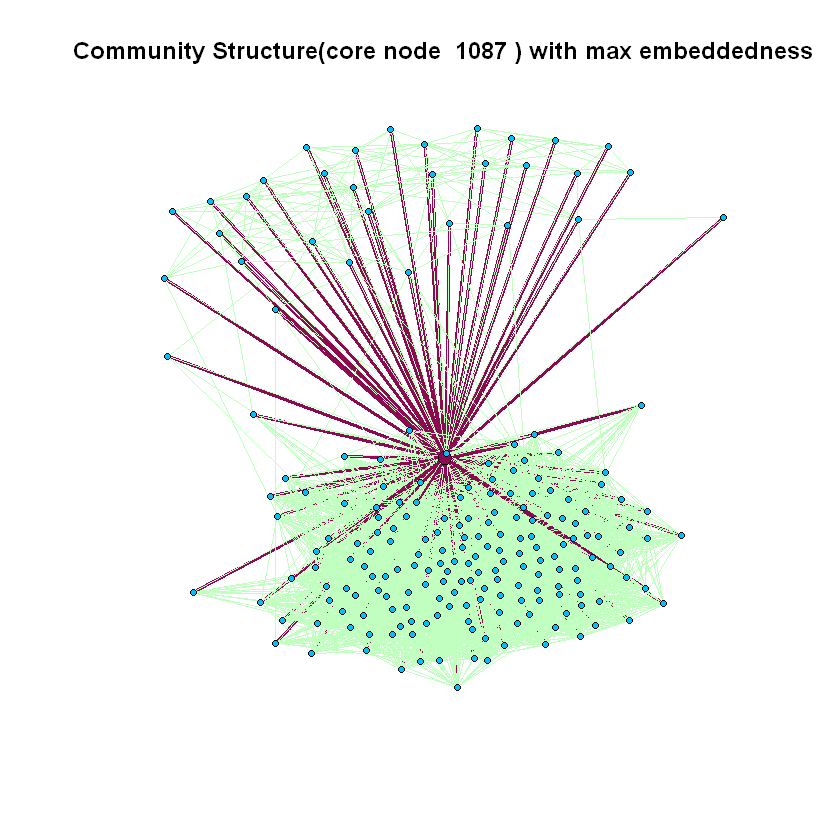

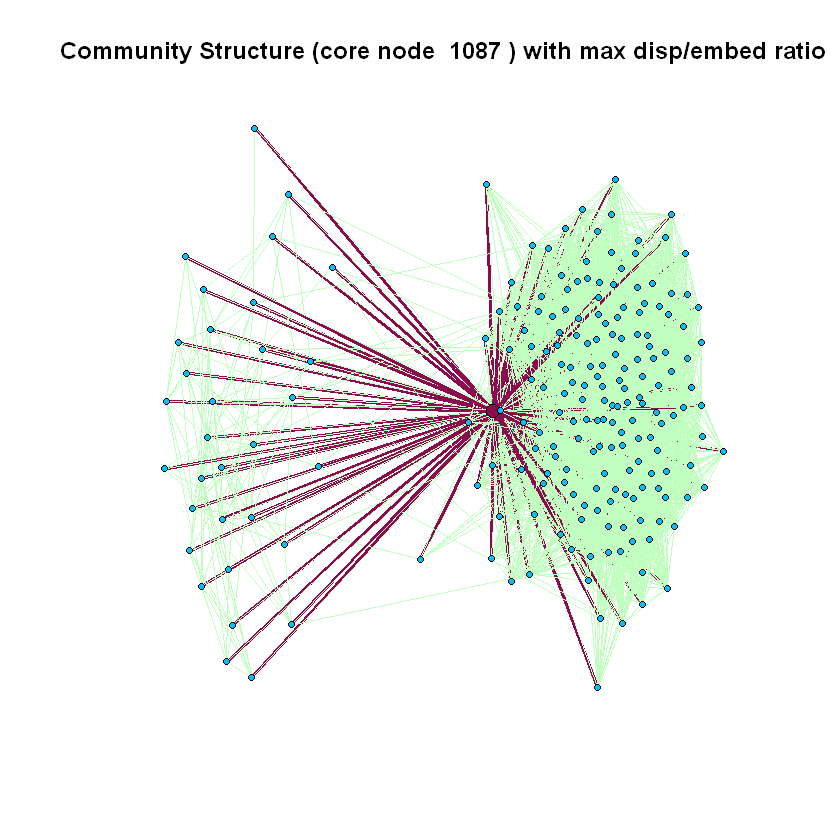

In [25]:
embeds_list <- list()
for (core_node in core_nodes) {
    Origcore <- core_node
    print(core_node)
    
    personal_network <- personalized_network(core_node)
    core_node <- which(V(personal_network)$label == core_node)
    print("done finding PN")

    neighbors <- neighbors(personal_network, core_node, mode="total")
    embeds <- c()
    disps <- c()
    ratio <- c()
    print("done finding neighbours")
    
    for (neighbor in neighbors) {
        cur_embed <- embeddedness(personal_network, neighbor, core_node)
        cur_disp <- dispersion(personal_network, neighbor, core_node)
        embeds <- c(embeds, cur_embed)
        disps <- c(disps, cur_disp)
        ratio <- c(ratio, cur_disp / cur_embed)
    }
    print("done finding neighbour")
    
    ############ Plot max dispersion ###########
    fc <- fastgreedy.community(personal_network)
    fc_node_color <- fc$membership + 1
    V(personal_network)$color <- "deepskyblue" 
    maxdisp = max(disps)
    maxdisp_node = which(disps == maxdisp)
    V(personal_network)$color[maxdisp_node] <- "deeppink4"
    V(personal_network)$size = 2.5
    V(personal_network)$size[maxdisp_node] = 5
    edge_color = rep("darkseagreen1", length(E(personal_network)))
    edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == maxdisp_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == maxdisp_node)] = "deeppink4";
    edge_arrow_size = rep(0.5, length(E(personal_network)))
    edge_arrow_size[which(get.edgelist(personal_network, name = FALSE)[,1] == maxdisp_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == maxdisp_node)] = 3;
    plot(personal_network, edge.width=edge_arrow_size, vertex.label="", edge.color = edge_color,
    main=paste("Community Structure(core node ",Origcore,") with max dispersion",collapse=""))
    
    ############ Plot max embeddedness ###########
    
    maxemb = max(embeds)
    maxemb_node = which(embeds == maxemb)
    V(personal_network)$color <- "deepskyblue" 
    V(personal_network)$color[maxemb_node] <- "deeppink4"
    V(personal_network)$size = 2.5
    V(personal_network)$size[maxemb_node] = 5
    #V(personal_network)$color[7] <- "green"
    edge_color = rep("darkseagreen1", length(E(personal_network)))
    edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == maxemb_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == maxemb_node)] = "deeppink4";
    edge_arrow_size = rep(0.5, length(E(personal_network)))
    edge_arrow_size[which(get.edgelist(personal_network, name = FALSE)[,1] == maxemb_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == maxemb_node)] = 3;
    plot(personal_network, edge.width=edge_arrow_size, vertex.label="", edge.color = edge_color,
    main=paste("Community Structure(core node ",Origcore,") with max embeddedness",collapse=""))
    
    ############ Plot max dispersion / embeddedness ###########
    
    maxratio = max(ratio, na.rm = TRUE)
    maxratio_node = which(ratio == maxratio)
    V(personal_network)$color <- "deepskyblue" 
    V(personal_network)$color[maxratio_node] <- "deeppink4"
    V(personal_network)$size = 2.5
    V(personal_network)$size[maxratio_node] = 5
    #V(personal_network)$color[7] <- "green"
    edge_color = rep("darkseagreen1", length(E(personal_network)))
    edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == maxratio_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == maxratio_node)] = "deeppink4";
    edge_arrow_size = rep(0.5, length(E(personal_network)))
    edge_arrow_size[which(get.edgelist(personal_network, name = FALSE)[,1] == maxratio_node | 
                     get.edgelist(personal_network, name = FALSE)[,2] == maxratio_node)] = 3;
    plot(personal_network, edge.width=edge_arrow_size, vertex.label="", edge.color = edge_color,
    main=paste("Community Structure (core node ",Origcore,") with max disp/embed ratio",collapse=""))
}


In [7]:
############ Question 16 #############

In [8]:
n_415 <- neighbors(network, 415)

In [9]:
n_415

+ 159/4039 vertices, from 545ebec:
  [1]  35 108 174 349 364 371 374 375 377 379 392 395 396 401 413 423 424 428
 [19] 429 432 435 437 439 462 466 476 481 484 493 497 501 507 514 515 516 525
 [37] 543 545 554 557 559 560 562 564 567 568 574 575 576 577 578 579 580 581
 [55] 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599
 [73] 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617
 [91] 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635
[109] 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653
[127] 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671
[145] 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686

In [10]:
g_415 <- induced_subgraph(network, c(415, n_415))
V(g_415)$label = sort(c(415, n_415))

In [11]:
V(g_415)$label

[1]  35 108 174 349 364 371 374 375 377 379 392 395 396 401 413 415 423 424
 [19] 428 429 432 435 437 439 462 466 476 481 484 493 497 501 507 514 515 516
 [37] 525 543 545 554 557 559 560 562 564 567 568 574 575 576 577 578 579 580
 [55] 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598
 [73] 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616
 [91] 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634
[109] 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652
[127] 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670
[145] 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686

In [12]:
degree_list <- degree(g_415, mode = "all")

In [13]:
length(which(degree_list == 24))

[1] 11

In [26]:
which(degree_list == 24)

[1]  31  53  75  90  93 102 118 133 134 136 137

In [14]:
############## Question 17 ##############

In [15]:
users <- which(degree_list == 24)

In [16]:
V(g_415)$label[users]

[1] 497 579 601 616 619 628 644 659 660 662 663

In [17]:
users

[1]  31  53  75  90  93 102 118 133 134 136 137

In [21]:
avg_acc = c()
for(user in users){
    accuracy = c()
    for(i in 1:10){
        delete_graph = g_415
    R = c()
    user_neighbors = neighbors(delete_graph, user, mode = "all")
        for (node in user_neighbors){
          if (runif(1, 0, 1) <= 0.25){
            delete_graph = delete_edges(delete_graph, edge(node, user))
            R = append(R, node)
          }
        }
        
        #### find the nodes that are not friends of the current user ###
        new_neighbors <- setdiff(user_neighbors, R)
        not_neighbors <- setdiff(V(delete_graph), c(user, new_neighbors))
        num_neighbors = length(R)
        comm_neighbors_score = c()
        for(node in not_neighbors){
            friends_j <- neighbors(delete_graph, node)
            comm_neighbors_score = c(comm_neighbors_score, length(intersect(new_neighbors, friends_j)))
        }
        ind = sort(comm_neighbors_score, index.return = TRUE)$ix
        P = not_neighbors[tail(ind, length(R))]
        intersect_R_P = intersect(R, P)
        accuracy = append(accuracy, length(intersect_R_P)/length(R))
    }
    avg_acc = c(avg_acc, mean(accuracy))
}

In [22]:
print("Average accuracy of algorithm Common Neighbours is ")
print(mean(avg_acc))

[1] "Average accuracy of algorithm Common Neighbours is "
[1] 0.8355519


In [23]:
jac_avg_acc = c()
for(user in users){
    j_accuracy = c()
    for(i in 1:10){
        delete_graph = g_415
    R = c()
    user_neighbors = neighbors(delete_graph, user, mode = "all")
        for (node in user_neighbors){
          if (runif(1, 0, 1) <= 0.25){
            delete_graph = delete_edges(delete_graph, edge(node, user))
            R = append(R, node)
          }
        }
        
        #### find the nodes that are not friends of the current user ###
        new_neighbors <- setdiff(user_neighbors, R)
        not_neighbors <- setdiff(V(delete_graph), c(user, new_neighbors))
        num_neighbors = length(R)
        comm_neighbors_score = c()
        for(node in not_neighbors){
            friends_j <- neighbors(delete_graph, node)
            comm_neighbors_score = c(comm_neighbors_score, length(intersect(new_neighbors, friends_j) / length(union(new_neighbors, friends_j))))
        }
        ind = sort(comm_neighbors_score, index.return = TRUE)$ix
        P = not_neighbors[tail(ind, length(R))]
        intersect_R_P = intersect(R, P)
        union_R_P = union(R, P)
        j_accuracy = append(j_accuracy, length(intersect_R_P)/length(R))
    }
    jac_avg_acc = c(jac_avg_acc, mean(j_accuracy))
}

In [24]:
print("Average accuracy of algorithm Jaccard is ")
print(mean(jac_avg_acc))

[1] "Average accuracy of algorithm Jaccard is "
[1] 0.8187298


In [23]:
aa_avg_acc = c()
for(user in users){
    aa_accuracy = c()
    for(i in 1:10){
        delete_graph = g_415
    R = c()
    user_neighbors = neighbors(delete_graph, user, mode = "all")
        for (node in user_neighbors){
          if (runif(1, 0, 1) <= 0.25){
            delete_graph = delete_edges(delete_graph, edge(node, user))
            R = append(R, node)
          }
        }
        
        #### find the nodes that are not friends of the current user ###
        new_neighbors <- setdiff(user_neighbors, R)
        not_neighbors <- setdiff(V(delete_graph), c(user, new_neighbors))
        num_neighbors = length(R)
        comm_neighbors_score = c()
        for(node in not_neighbors){
            friends_j <- neighbors(delete_graph, node)
            k = intersect(new_neighbors, friends_j)
            sum = 0
            for(n in k){
                sum = sum + 1 / log2(length(neighbors(delete_graph, n)))
            }
            comm_neighbors_score = c(comm_neighbors_score, sum)
        }
        ind = sort(comm_neighbors_score, index.return = TRUE)$ix
        P = not_neighbors[tail(ind, length(R))]
        intersect_R_P = intersect(R, P)
        
        aa_accuracy = append(aa_accuracy, length(intersect_R_P)/length(R))
    }
    aa_avg_acc = c(aa_avg_acc, mean(aa_accuracy))
}

In [24]:
print("Average accuracy of algorithm Adamic-Adar is ")
print(mean(aa_avg_acc))

[1] "Average accuracy of algorithm Adamic-Adar is "
[1] 0.841663
